# Employee-Absenteesim-Case-Study

### Aim: To Predict the predominant reason for absenteeism from work

### Problem

- From a business perspective, employees who are not present to do their jobs, will cost more than they should. 

- The absence is a big problem because it reduces output and is annoying because it requires rescheduling and changing programs which is one of the contributing factors to the failure of a department's organization to meet performance targets.

### Objective

- Based on these problems, this analysis is carried out to predict the predominant reason for employees absenteeism from work. 

- To get answers to these problems, an analysis is carried out using supervised machine learning: Logistic regression.

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Load DataSet

In [2]:
data = pd.read_csv('Absenteeism_data.csv')

In [3]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Make a Raw Backup-copy before analysis

In [4]:
df = data.copy()

In [5]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Checking the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


### Cleaning the dataset
- Removing the 'ID' column, which exists merely to differentiate persons from one another and contains no numerical information. 
- This 'ID' cannot assist us in describing the value of absenteeism time.

In [7]:
df = df.drop(['ID'], axis =1 )

In [8]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Exploring the dataset for absence pattern based off on reason

In [9]:
df['Reason for Absence'].min()

0

In [10]:
df['Reason for Absence'].max()

28

In [11]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [12]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

## Exploratory Data Analysis

In [13]:
df.describe()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [14]:
pd.DataFrame(df.columns.values)

,0
0,Reason for Absence
1,Date
2,Transportation Expense
3,Distance to Work
4,Age
5,Daily Work Load Average
6,Body Mass Index
7,Education
8,Children
9,Pets


### Separating numeric coloums into <code>numeric_data</code>

In [15]:
numeric_data = df.select_dtypes(exclude = object).columns
numeric_list = numeric_data.drop(['Reason for Absence', 'Education'])
pd.DataFrame(numeric_list)

,0
0,Transportation Expense
1,Distance to Work
2,Age
3,Daily Work Load Average
4,Body Mass Index
5,Children
6,Pets
7,Absenteeism Time in Hours


### Different plots for analysis (Histogram)

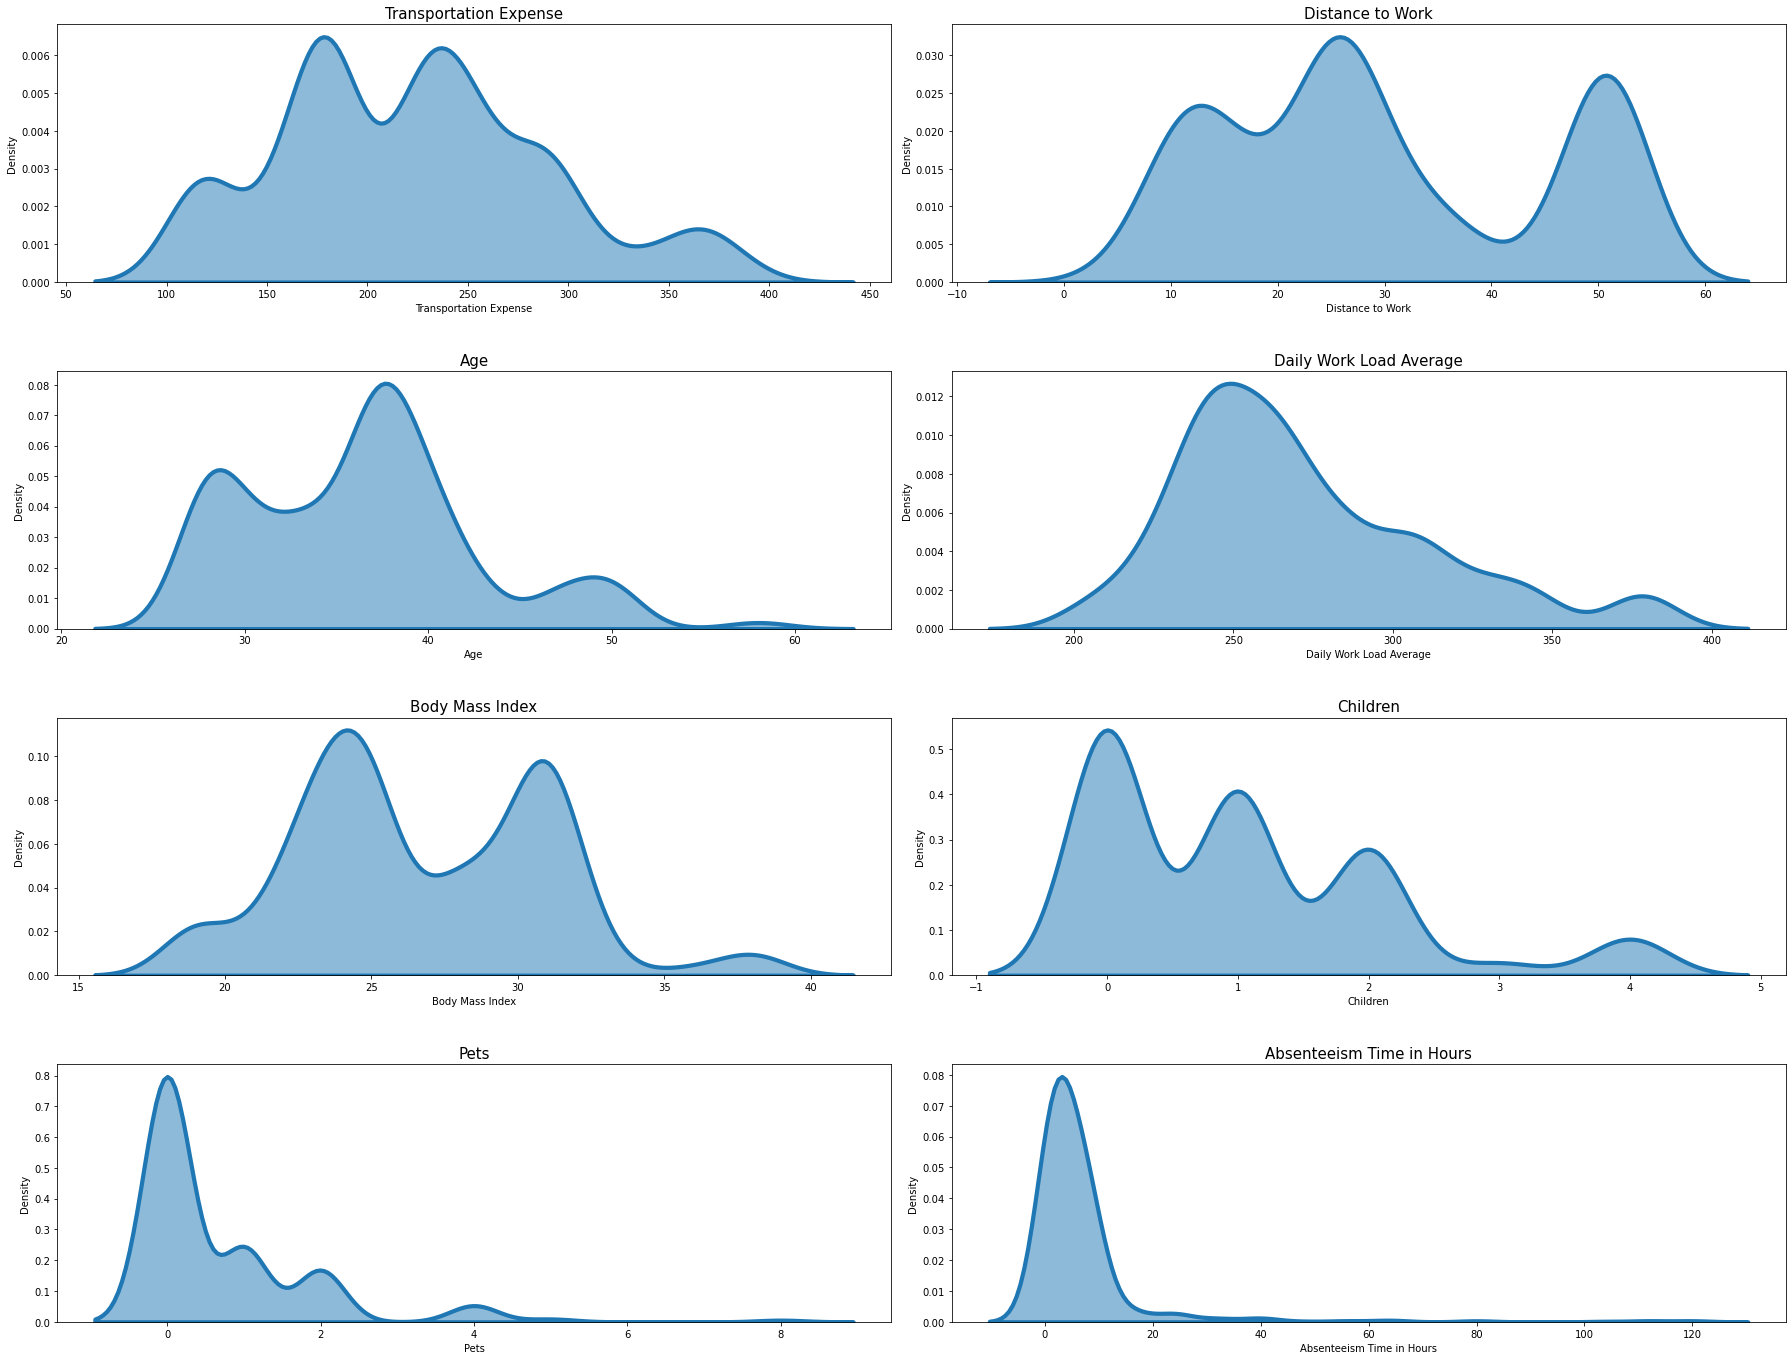

In [16]:
plt.figure(figsize=(25,19))
a = 1
for i in numeric_list:
    plt.subplot(4,2,a)
    plt.title(i,fontsize=15)
    sns.kdeplot(df[i],shade=True, alpha=.5, linewidth=4.2)
    a+=1
    plt.tight_layout(h_pad=4)

### Box plot

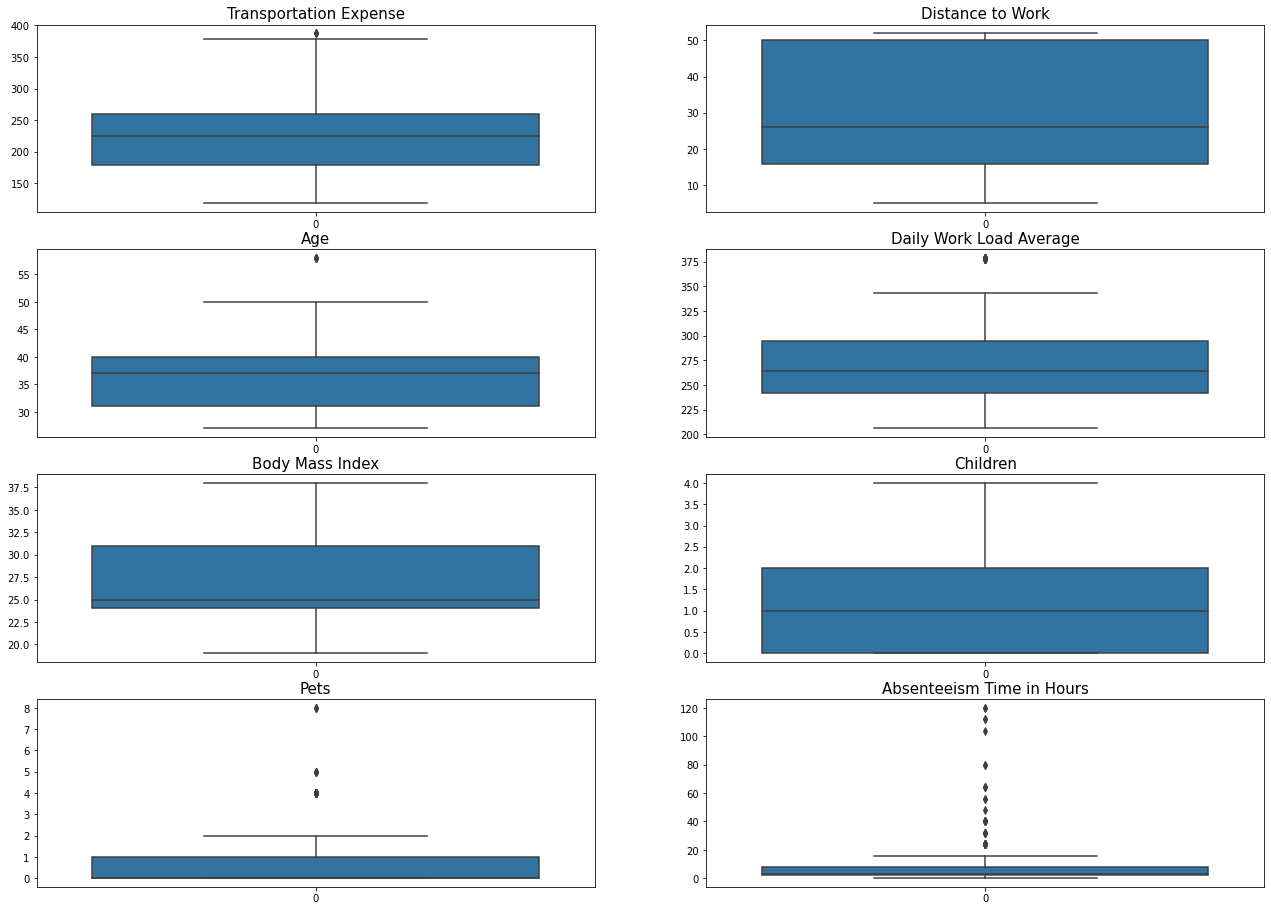

In [17]:
plt.figure(figsize=(22,20))
a = 1
for i in numeric_list:
    plt.subplot(5,2,a)
    plt.title(i,fontsize=15)
    sns.boxplot(data=df[i])
    a+=1
#     plt.tight_layout(h_pad=4)